# 1. Data Load

In [1]:
import numpy as np
import pandas as pd
import os
import math

from scipy import stats #Analysis 
from scipy.stats import norm 

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [2]:
# pandas option 설정 하는 코드
# monthly_gain의 경우 부동소수점으로 나타나서 보기 어려울땐 윗 줄의 주석을 제거하고 아래에 주석을 추가하고
# 다시 원래대로 돌리고 싶다면 아래에 주석제거, 위 코드에 주석추가
pd.options.display.float_format = '{:.2f}'.format
#pd.reset_option('display.float_format')

In [3]:
path = "./Dataset/"

data = pd.read_csv(path+"train.csv")

# original data -> data
data

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.00,5.00,5.00,5.00,1.00,4.00,5.00,5.00,1.00,...,1.00,20,2.00,12.00,4.00,2.00,1.00,4.00,2.00,1
1,1,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,3.00,...,1.00,49,1.00,2.00,1.00,1.00,2.00,4.00,2.00,1
2,2,4.00,5.00,5.00,4.00,3.00,5.00,5.00,5.00,4.00,...,2.00,43,1.00,2.00,2.00,2.00,3.00,4.00,2.00,1
3,3,4.00,4.00,4.00,2.00,4.00,3.00,3.00,5.00,3.00,...,1.00,17,2.00,1.00,1.00,2.00,1.00,2.00,2.00,1
4,4,4.00,4.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,...,2.00,18,2.00,12.00,1.00,2.00,1.00,1.00,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2.00,5.00,4.00,3.00,3.00,4.00,4.00,4.00,3.00,...,1.00,17,1.00,1.00,3.00,2.00,1.00,3.00,2.00,0
14996,14996,5.00,4.00,5.00,4.00,4.00,5.00,5.00,4.00,4.00,...,2.00,45,1.00,3.00,1.00,1.00,2.00,3.00,2.00,1
14997,14997,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,...,1.00,20,1.00,1.00,2.00,1.00,1.00,3.00,1.00,1
14998,14998,5.00,5.00,4.00,5.00,5.00,5.00,5.00,1.00,5.00,...,1.00,29,1.00,12.00,4.00,2.00,2.00,2.00,1.00,0


# 2. EDA 

15,000 rows × 70 columns

- feature (1)
    - index 
- Categorical variable (63)
    - country : 137 values, not valanced 
    - education : 4 values 
    - urban : 4 values, but start with 0 
    - gender : 3 
    - engnat : 2 
    - hand : 3 
    - religion : 12 
    - orientation : 5
    - voted : 2
    - married : 3
    - ASD : 2 
    - Q(26) : 5 values
        - 1=Disagree, 2=Slightly disagree, 3=Neutral, 4=Slightly agree, 5=Agree
    - TIPI(10) : 5 values 
        - items were rated "I see myself as:" _____ such that Extraverted, enthusiastic...
    - VCL(16) : 2 values (0 or 1) 
        - no more need for preprocessing
- Numerical variable (5)
    - introelapse : 1315 values 
    - testelapse : 684 values 
    - surveyelapse : 712 values
    - age : 76 values, but maybe outlier...
    - familysize : 20 values, but maybe outlier... 
- Y variable (1)
    - nerdiness 
        - binary classification 
        - 1:8303, 0:6697

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         15000 non-null  int64  
 1   Q1            14959 non-null  float64
 2   Q2            14931 non-null  float64
 3   Q3            14950 non-null  float64
 4   Q4            14929 non-null  float64
 5   Q5            14962 non-null  float64
 6   Q6            14952 non-null  float64
 7   Q7            14924 non-null  float64
 8   Q8            14952 non-null  float64
 9   Q9            14944 non-null  float64
 10  Q10           14928 non-null  float64
 11  Q11           14941 non-null  float64
 12  Q12           14933 non-null  float64
 13  Q13           14960 non-null  float64
 14  Q14           14964 non-null  float64
 15  Q15           14955 non-null  float64
 16  Q16           14967 non-null  float64
 17  Q17           14963 non-null  float64
 18  Q18           14937 non-nu

<AxesSubplot:>

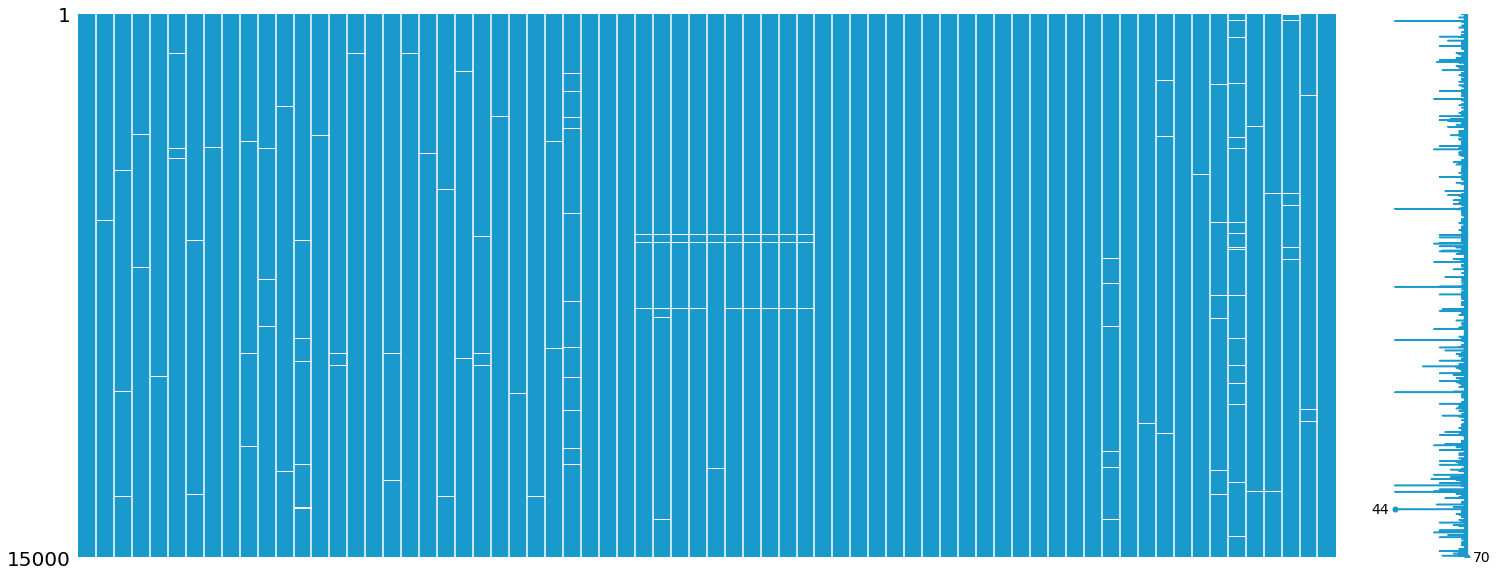

In [5]:
# missing value check 
# There are so many missing values in promotion columns... 
msno.matrix(data.iloc[:, :], color=(0.1, 0.6, 0.8))

In [108]:
# 그냥 missing value가 있는 행을 모두 drop 처리하면 
# 12639만 남음 
# 2361개의 data 박살남 
# null data를 살리는 연구가 필요함 
data_notnull = data.dropna(axis=0)
data_notnull

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.00,5.00,5.00,5.00,1.00,4.00,5.00,5.00,1.00,...,1.00,20,2.00,12.00,4.00,2.00,1.00,4.00,2.00,1
1,1,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,3.00,...,1.00,49,1.00,2.00,1.00,1.00,2.00,4.00,2.00,1
2,2,4.00,5.00,5.00,4.00,3.00,5.00,5.00,5.00,4.00,...,2.00,43,1.00,2.00,2.00,2.00,3.00,4.00,2.00,1
3,3,4.00,4.00,4.00,2.00,4.00,3.00,3.00,5.00,3.00,...,1.00,17,2.00,1.00,1.00,2.00,1.00,2.00,2.00,1
4,4,4.00,4.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,...,2.00,18,2.00,12.00,1.00,2.00,1.00,1.00,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2.00,5.00,4.00,3.00,3.00,4.00,4.00,4.00,3.00,...,1.00,17,1.00,1.00,3.00,2.00,1.00,3.00,2.00,0
14996,14996,5.00,4.00,5.00,4.00,4.00,5.00,5.00,4.00,4.00,...,2.00,45,1.00,3.00,1.00,1.00,2.00,3.00,2.00,1
14997,14997,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,...,1.00,20,1.00,1.00,2.00,1.00,1.00,3.00,1.00,1
14998,14998,5.00,5.00,4.00,5.00,5.00,5.00,5.00,1.00,5.00,...,1.00,29,1.00,12.00,4.00,2.00,2.00,2.00,1.00,0


### Question Columns 

Q, TIPI, VCL

In [35]:
# check the data distribution using histogram
def check_histogram(columns, row, col) :
    plt.style.use("ggplot") 
    plt.figure(figsize=(17,10))
    plt.suptitle("Data Histogram", fontsize=20)
    
    for i in range(len(columns)):
        plt.subplot(row,col,i+1)
        plt.title(columns[i], fontsize=15)
        # 값의 종류가 20개가 넘을 경우 blue 
        if len(data[columns[i]].unique()) > 20:  
            plt.hist(data[columns[i]], color='b', alpha=0.7)
        # 아닐 경우 orange
        else: 
            temp = data[columns[i]].value_counts()
            plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
            plt.xticks(temp.keys())

    plt.tight_layout(rect=[0, 0.01, 1, 0.95])
    plt.show()

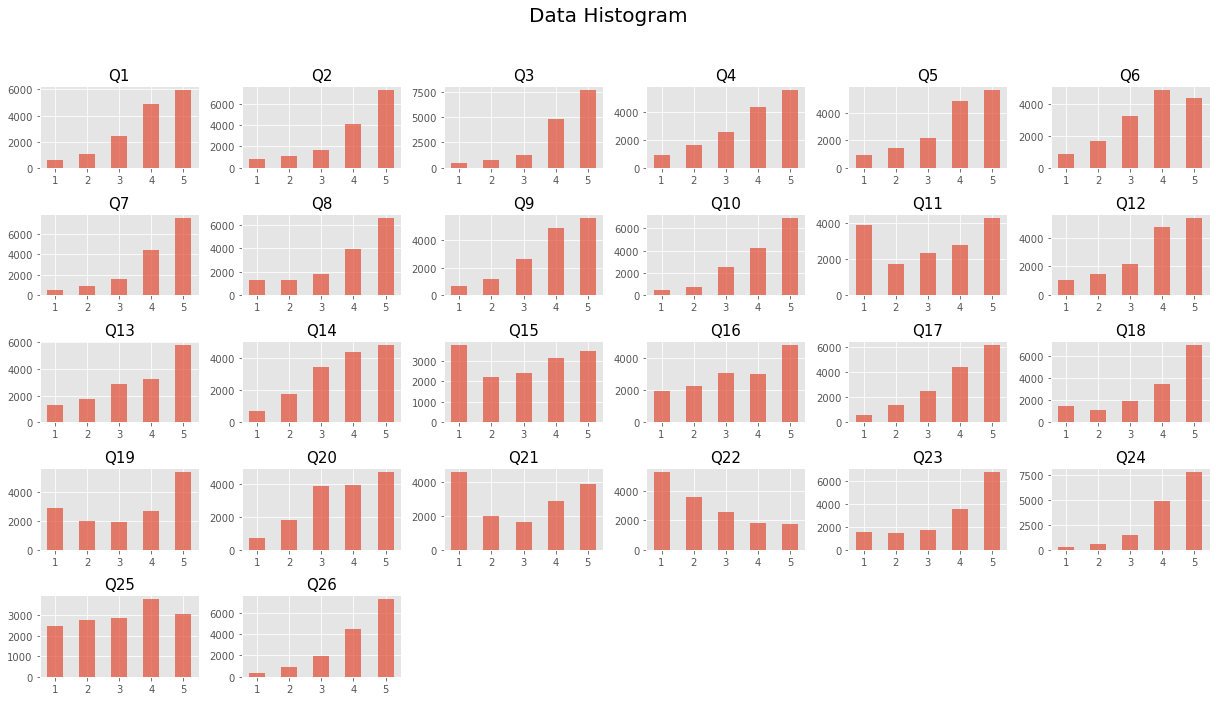

In [37]:
check_histogram(data.iloc[:, 1:27].columns, 5, 6)

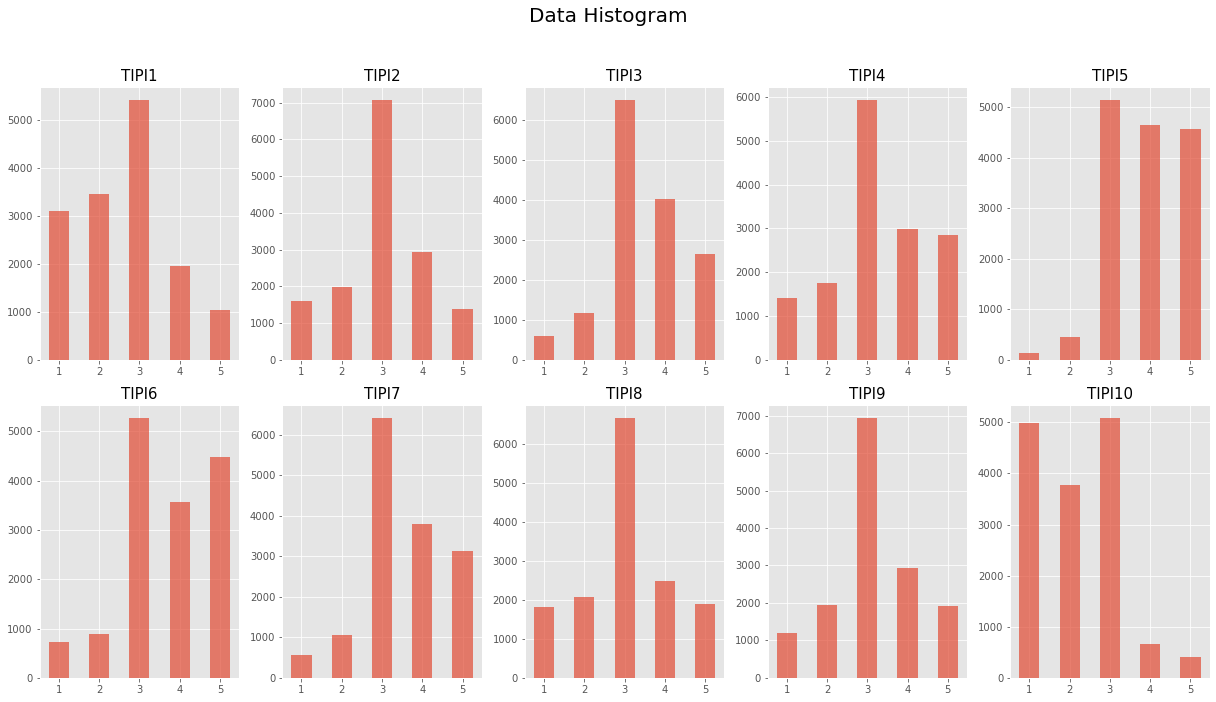

In [50]:
check_histogram(data.iloc[:, 31:41].columns, 2, 5)

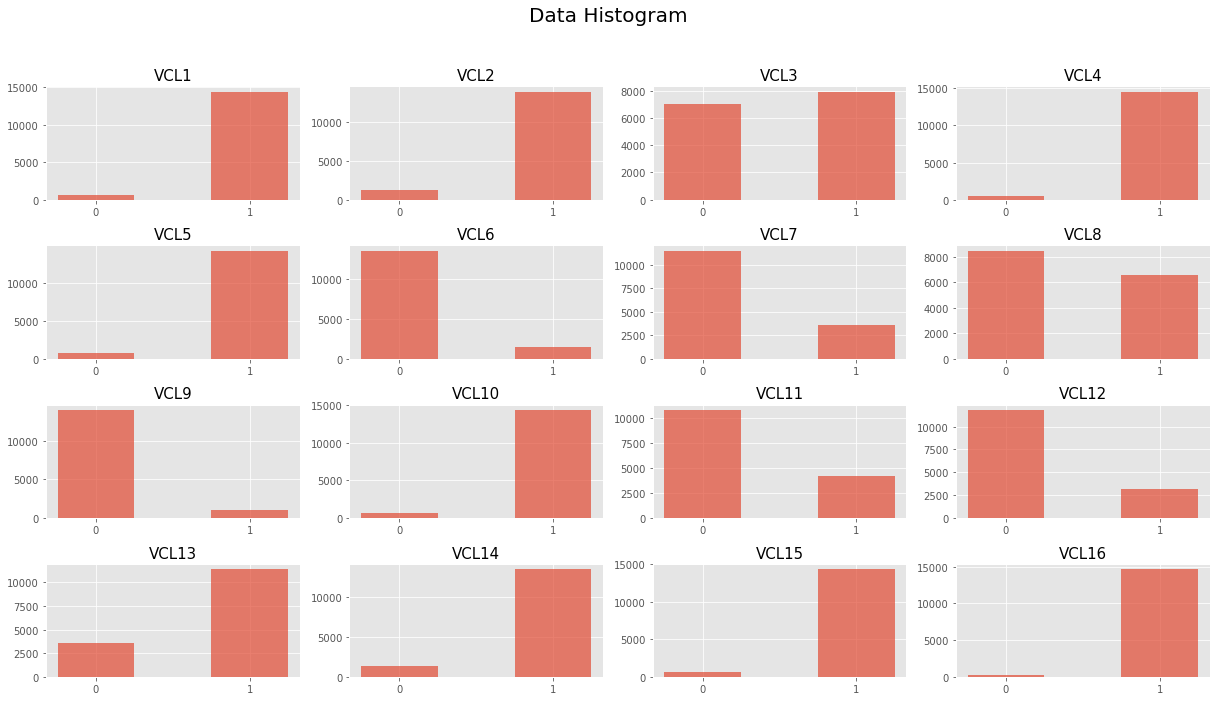

In [55]:
check_histogram(data.iloc[:, 41:57].columns, 4, 4)

### Categorical Variable

country, education, urban, gender, engnat, hand, religion, orientation, voted, married, ASD (11)

In [ ]:
cat_cols = ['country', 'education', 'urban', 'gender', 
            'engnat', 'hand', 'religion', 'orientation',
            'voted', 'married', 'ASD']

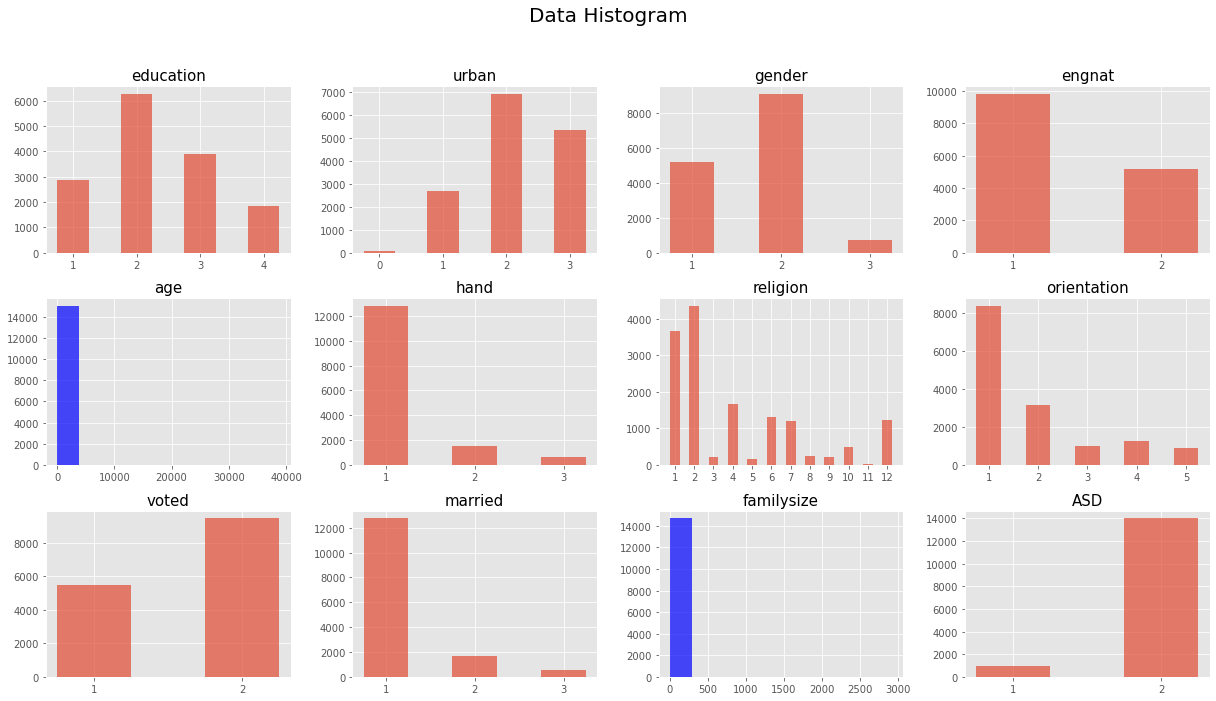

In [72]:
check_histogram(data.iloc[:, 57:69].columns, 3, 4)

In [34]:
# check value counts for categorical variables 
# cardinality가 굉장히 적은 카테고리에 대해서는 nan으로 바꾸고 imputation하기도 함 
for col in cat_cols:
    print(data[col].value_counts())
    print('Nan', data[col].isna().sum())
    print('==='*10)

USA    7419
GBR    1109
CAN     915
AUS     525
DEU     473
       ... 
PNG       1
MUS       1
MDV       1
GRL       1
ETH       1
Name: country, Length: 137, dtype: int64
Nan 190
2.00    6251
3.00    3887
1.00    2872
4.00    1823
Name: education, dtype: int64
Nan 167
2    6888
3    5326
1    2704
0      82
Name: urban, dtype: int64
Nan 0
2.00    9074
1.00    5178
3.00     729
Name: gender, dtype: int64
Nan 19
1.00    9779
2.00    5174
Name: engnat, dtype: int64
Nan 47
1.00    12794
2.00     1550
3.00      609
Name: hand, dtype: int64
Nan 47
2.00     4335
1.00     3665
4.00     1674
6.00     1317
12.00    1233
7.00     1198
10.00     483
8.00      246
3.00      216
9.00      211
5.00      156
11.00      21
Name: religion, dtype: int64
Nan 245
1.00    8331
2.00    3157
4.00    1254
3.00     987
5.00     872
Name: orientation, dtype: int64
Nan 399
2.00    9443
1.00    5472
Name: voted, dtype: int64
Nan 85
1.00    12753
2.00     1646
3.00      519
Name: married, dtype: int64
Nan 82
2.00

In [32]:
# 국가 개수가 1개인 곳 28곳
df_country = pd.DataFrame(data['country'].value_counts())
df_country[df_country['country']==1].index

Index(['MWI', 'GTM', 'AGO', 'LAO', 'GUY', 'AFG', 'RWA', 'SYR', 'BLR', 'BRB',
       'MNG', 'MDG', 'MNP', 'KHM', 'MAC', 'VIR', 'KAZ', 'UGA', 'LBY', 'VGB',
       'ALA', 'IRQ', 'GUF', 'PNG', 'MUS', 'MDV', 'GRL', 'ETH'],
      dtype='object')

In [109]:
# null제거 후 130개의 나라만 남음 
data_notnull['country'].value_counts()

USA    6373
GBR     935
CAN     797
AUS     461
DEU     409
       ... 
MDG       1
GUF       1
PNG       1
GRL       1
ETH       1
Name: country, Length: 130, dtype: int64

### Numerical

age 
- null x 
- 이상치 섞여 있음 
    - 6명(23 123 545 722 38822 336)
- 이상치를 제거할 것인가? 남길 것인가? 
- 나이를 범주형으로(10대 20대...) 사용할 것인가? 

familysize 
- 319 null 
- 이상치 섞여 있음 
    - 1명(2919) 
    - 39인 사람 2명이 있지만 일단 pass 

In [74]:
data['familysize'].value_counts()

2.00       6303
3.00       3573
1.00       2373
4.00       1445
5.00        535
6.00        256
7.00         97
8.00         53
9.00         14
10.00        10
13.00         5
11.00         4
12.00         3
39.00         2
23.00         2
14.00         2
16.00         1
2919.00       1
19.00         1
17.00         1
Name: familysize, dtype: int64

In [110]:
# null 제거 해도 여전히 이상치 존재 
data_notnull['familysize'].value_counts()

2.00       5418
3.00       3096
1.00       2048
4.00       1240
5.00        451
6.00        217
7.00         86
8.00         45
9.00         14
10.00         7
13.00         4
23.00         2
39.00         2
12.00         2
14.00         2
11.00         2
2919.00       1
19.00         1
17.00         1
Name: familysize, dtype: int64

(array([8.676e+03, 5.018e+03, 7.910e+02, 1.500e+02, 1.400e+01, 1.400e+01,
        8.000e+00, 2.000e+00, 2.000e+00, 1.000e+00]),
 array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. , 11.8, 13.6, 15.4, 17.2, 19. ]),
 <BarContainer object of 10 artists>)

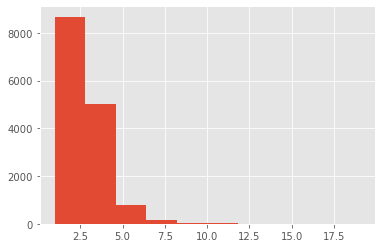

In [101]:
plt.hist(data[data['familysize'] <= 20]['familysize'])

In [73]:
data['age'].value_counts()

18     1386
17     1313
16     1239
19     1101
20      932
       ... 
77        1
99        1
81        1
336       1
80        1
Name: age, Length: 76, dtype: int64

In [79]:
data['age'].describe()

count   15000.00
mean       26.74
std       317.06
min        13.00
25%        17.00
50%        20.00
75%        27.00
max     38822.00
Name: age, dtype: float64

In [93]:
# 100 살 이상의 나이를 확인 
# 123 123 545 722 38822 336 -> 총 6명 
data[data['age'] <= 100]['age'].describe()

count   14994.00
mean       24.04
std        10.78
min        13.00
25%        17.00
50%        20.00
75%        27.00
max       100.00
Name: age, dtype: float64

(array([8.589e+03, 3.632e+03, 1.257e+03, 6.890e+02, 4.830e+02, 2.660e+02,
        6.100e+01, 1.400e+01, 1.000e+00, 2.000e+00]),
 array([ 13. ,  21.7,  30.4,  39.1,  47.8,  56.5,  65.2,  73.9,  82.6,
         91.3, 100. ]),
 <BarContainer object of 10 artists>)

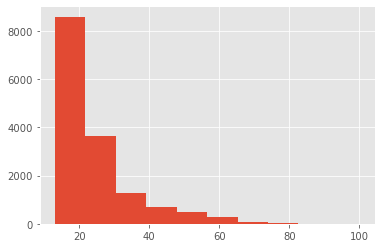

In [96]:
# 10대에 몰려있음을 알 수 있음 
plt.hist(data[data['age'] <= 100]['age'], bins=10)

In [157]:
data_notnull[data_notnull['age']>=90]['age']

1019       100
1739       123
4002       123
4976       545
6725       722
9273     38822
14135      336
Name: age, dtype: int64

In [111]:
# 여전히 이상치 존재 
data_notnull['age'].value_counts()

18       1182
17       1116
16       1051
19        945
20        805
         ... 
100         1
38822       1
77          1
81          1
336         1
Name: age, Length: 71, dtype: int64

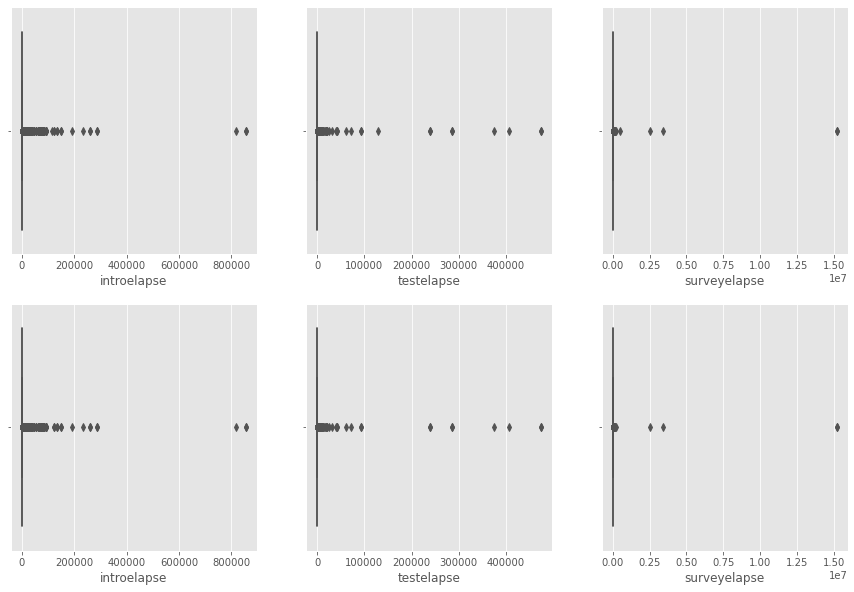

In [147]:
# elapse 뜻은 경과(시간이 경과하다, 흐르다)
# 초기 경과 시간, 테스트 경과 시간, 설문 경과 시간? 
elapse_cols = ['introelapse','testelapse','surveyelapse']

plt.style.use("ggplot") 
plt.figure(figsize=(15,10))
    
for i in range(len(elapse_cols)*2):
    plt.subplot(2,3,i+1)
    if (i<3) : sns.boxplot(x=elapse_cols[i], data=data)
    else : sns.boxplot(x=elapse_cols[i-3], data=data_notnull)

In [151]:
# 이상치가 강하게 있어 보임 
# right skewed -> log transform
# remove outlier 
data[elapse_cols].describe()

,introelapse,testelapse,surveyelapse
count,15000.00,15000.00,15000.00
mean,767.14,387.97,2787.96
std,13835.95,8513.03,178595.46
min,1.00,1.00,3.00
25%,4.00,82.00,126.00
50%,10.00,106.00,164.00
75%,36.00,140.00,217.00
max,855030.00,474572.00,15166994.00


### Y variable 

([<matplotlib.axis.XTick at 0x21e86d06040>,
 [Text(0, 0, ''), Text(0, 0, '')])

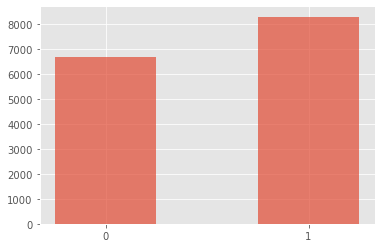

In [78]:
temp = data['nerdiness'].value_counts()
plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
plt.xticks(temp.keys())

In [71]:
data['nerdiness'].value_counts()

1    8303
0    6697
Name: nerdiness, dtype: int64

In [35]:
data[num_cols].corr()

,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Weekly_Sales,Unemployment,Fuel_Price,Temperature,Store
Promotion1,1.000000,0.028262,-0.108023,0.820015,0.173296,0.317564,0.030090,0.087613,-0.059489,-0.158183
Promotion2,0.028262,1.000000,-0.049666,-0.009585,-0.006747,0.094407,0.017877,-0.214387,-0.323549,-0.040512
Promotion3,-0.108023,-0.049666,1.000000,-0.073920,-0.024157,0.199661,0.008663,-0.095478,-0.097627,-0.037557
Promotion4,0.820015,-0.009585,-0.073920,1.000000,0.107567,0.162143,0.017714,-0.028819,-0.072568,-0.015109
Promotion5,0.173296,-0.006747,-0.024157,0.107567,1.000000,0.297707,-0.007787,-0.116167,-0.027799,-0.051439
Weekly_Sales,0.317564,0.094407,0.199661,0.162143,0.297707,1.000000,-0.107331,0.010986,-0.063231,-0.335569
Unemployment,0.030090,0.017877,0.008663,0.017714,-0.007787,-0.107331,1.000000,-0.025728,0.102688,0.223808
Fuel_Price,0.087613,-0.214387,-0.095478,-0.028819,-0.116167,0.010986,-0.025728,1.000000,0.148054,0.058628
Temperature,-0.059489,-0.323549,-0.097627,-0.072568,-0.027799,-0.063231,0.102688,0.148054,1.000000,-0.022895
Store,-0.158183,-0.040512,-0.037557,-0.015109,-0.051439,-0.335569,0.223808,0.058628,-0.022895,1.000000


C:\Users\mtang\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\mtang\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


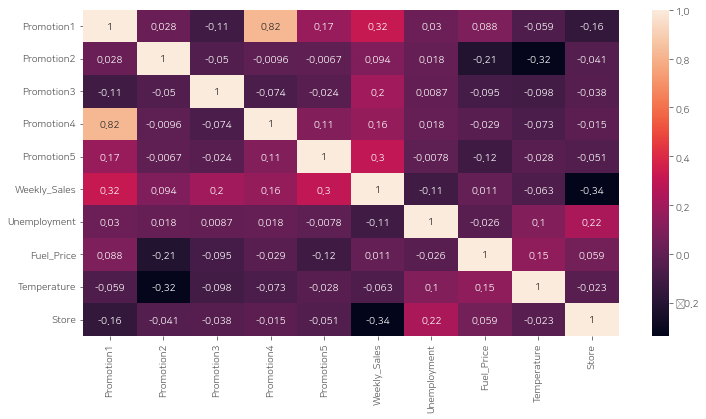

In [37]:
# check multicollinearity, 다중공선성
# maybe in.. (promotion4, promotion1)
corr_df = data[num_cols].corr(method='pearson')

plt.figure(figsize=(12, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

연속형 변수들 중에서는 약한 상관관계(기준은 0.3으로 생각하였음)마저도 있는 변수쌍이 없는 것으로 보입니다.  
다중공선성문제는 없을 것 같습니다. 

In [49]:
df_num.describe()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week,target
count,17480.00,17480.00,17480.00,17480.00,17480.00,17480.00
mean,38.72,189760.96,1076.64,83.87,40.00,0.23
std,14.08,104992.94,7439.50,396.03,12.67,0.42
min,17.00,12285.00,0.00,0.00,1.00,0.00
25%,27.00,118155.75,0.00,0.00,38.00,0.00
50%,37.00,178134.00,0.00,0.00,40.00,0.00
75%,48.00,237318.00,0.00,0.00,45.00,0.00
max,90.00,1455435.00,99999.00,4356.00,99.00,1.00


연속형 변수들의 통계량을 집계하였습니다.  
아무래도 나이와 수입, 시간, wgt 는 서로 단위가 달라서 적절한 정규화가 필요해 보입니다.
hours.per.week 중 max 값이 99.00 이 존재하는데, 7일 동안 100시간을 일하는 것은 하루에 14~15시간을 일한 것과 같습니다. 이상치를 확인해보아야 할 것 같습니다. 